# Question 1 <div style="text-align: right"> [10 pts] </div>

### 1. Import Libraries (keep them here for clarity) <div style="text-align: right"> [0.25 pts] </div>

In [2]:
# points will be granted for all the imports to be kept here, untill and unless justification is provided.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


### 2. Load the dataset <div style="text-align: right"> [0.5 pts] </div>

#### Use : 'boston housing' dataset from sklearn

In [3]:

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


### 3.  Seggregate data in variables <div style="text-align: right"> [0.25 pts] </div>

In [9]:
vals = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(vals.data.shape)

(506, 13)


### 4.  Convert in Pandas Dataframe and show as below <div style="text-align: right"> [0.25 pts] </div>

In [11]:
attributes = ["CRIM","ZN","INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
"RAD" , "TAX", "PTRATIO" ,"B", "LSTAT"]#, "MEDV"]
df = pd.DataFrame(vals, columns=attributes)
df['PRICE'] = target

df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None, names=attributes)

# Replace NaN values with 0.0
replacement_values = attributes[:-1]  
df[replacement_values] = df[replacement_values].fillna(0.0)


df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,0.0,NaN
1,396.90000,4.98,24.00,0.0,0.000,0.000,0.0,0.0000,0.0,0.0,0.0,0.0,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,0.0,NaN
3,396.90000,9.14,21.60,0.0,0.000,0.000,0.0,0.0000,0.0,0.0,0.0,0.0,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,0.0,NaN


### 5.  Split the dataset into training and testing sets <div style="text-align: right"> [0.5 pts] </div>

#### Note : test size --> 20% and random state ---> 111

In [13]:

X_train, X_test, y_train, y_test = train_test_split(vals, target, test_size=0.2, random_state=111)

# Print the shapes of the training and test sets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


### 6. Explain the differences between Linear /  Ridge regression <div style="text-align: right"> [1 pts] </div>

#### 6.1. Magnitude of Coefficients:

In [14]:
# Fit the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get the coefficients
coefficients = linear_model.coef_
magnitudes = abs(coefficients)
print(magnitudes)

[7.48337753e-02 5.14752164e-02 3.97589082e-02 2.45234005e+00
 1.63149112e+01 3.80836814e+00 8.76931962e-03 1.43470363e+00
 2.74837393e-01 1.20744867e-02 9.10116591e-01 1.08478530e-02
 5.14496805e-01]


#### 6.2. Fitting (Over/Under):

In [15]:
# Predict on training and test data
y_training_prediction = linear_model.predict(X_train)
y_testing_prediction = linear_model.predict(X_test)

# calculate mse and mse test
mse_trainining_score = mean_squared_error(y_train, y_training_prediction)
mse_testing_score = mean_squared_error(y_test, y_testing_prediction)

print("MSE on training data:", mse_trainining_score)
print("MSE on test data:", mse_testing_score)

# since the MSE values are relatively close for both the training and test data this suggests that the 
# linear regression model is performing consistely on bot the trained data and the unseen data

MSE on training data: 21.761080534382224
MSE on test data: 23.066428424068572


#### 6.3. Feature Importance:

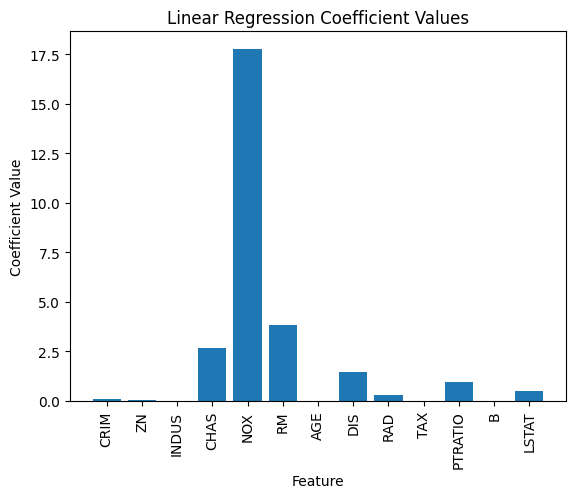

In [17]:


# Initialize a linear regression model
linear_model = LinearRegression()

# Fit the model 
linear_model.fit(vals, target)
coefficients = abs(linear_model.coef_)

plt.bar(attributes, coefficients)
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.title("Linear Regression Coefficient Values")
plt.xticks(rotation=90)
plt.show()

#### 6.4. Model Complexity:

In [183]:
# This model isnt that complex. Complexity can be determined by the number of features/attributes and number of model parameters.


### 7. Implement Linear Regression - sklearn <div style="text-align: right"> [1 pts] </div>

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


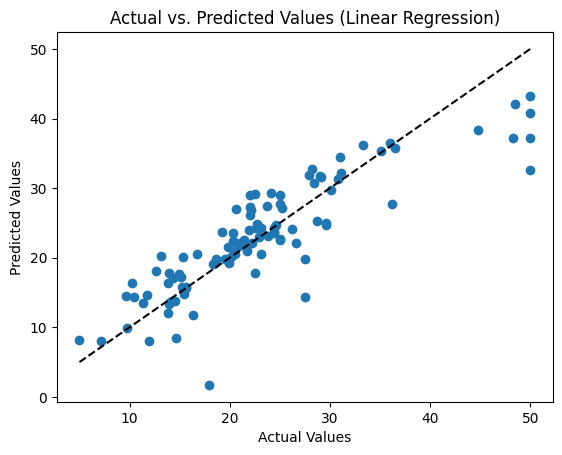

In [18]:

# Create a DataFrame
df = pd.DataFrame(vals, columns=attributes)

# Split the data
X = df
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

# Create and train the linear regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_prediction = linear_model.predict(X_test)

# Create a scatter plot to visualize the actual vs. predicted values
plt.scatter(y_test, y_prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='k', label='Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.show()




### 8. Implement Ridge Regression with lambda = 1.0 - sklearn <div style="text-align: right"> [1 pts] </div>

In [19]:
# Create a Ridge Regression model with alpha = 1.0
ridge_regression_model = Ridge(alpha=1.0)
ridge_regression_model.fit(X_train, y_train)



Ridge()

### 9. Evaluate the models (M.S.E) <div style="text-align: right"> [0.5 pts] </div>

In [20]:
# Make predictions on the test data
y_pred = ridge_regression_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 23.63737071708971
R-squared: 0.7393697865727915


### 10. Plot the coefficients of Linear and Ridge Regression models <div style="text-align: right"> [0.5 pts] </div>

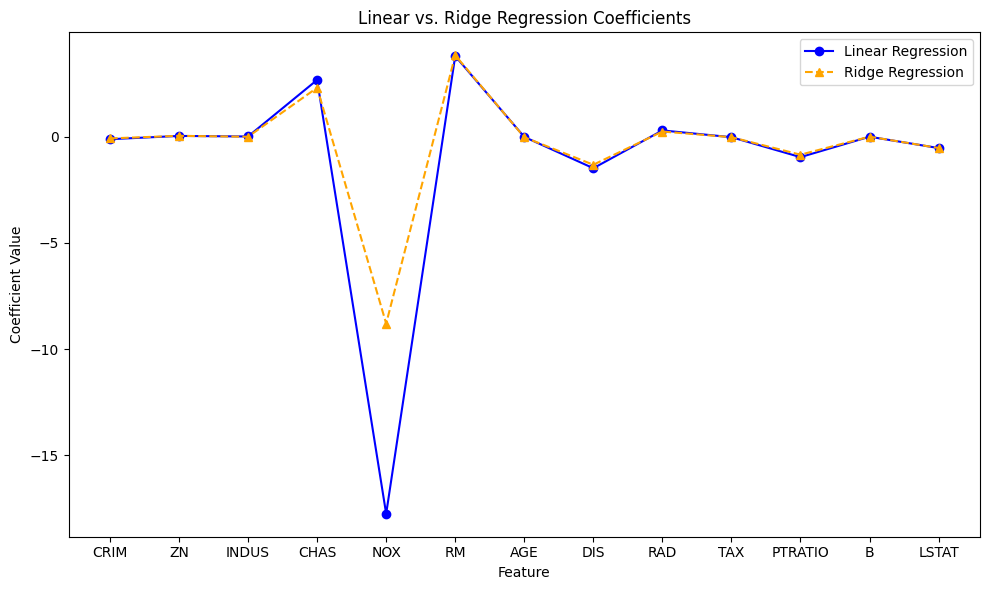

In [21]:
# reference below
# Fit both models to the data
linear_regression_model.fit(X_train, y_train)
ridge_regression_model.fit(X_train, y_train)

# Get the coefficients from both models
linear_coeffs = linear_model.coef_
ridge_coeffs = ridge_regression_model.coef_

# Create subplots for linear and ridge coefficients
plt.figure(figsize=(10, 6))

plt.plot(attributes, linear_coeffs, color='b', marker='o', linestyle='-', label='Linear Regression')
plt.plot(attributes, ridge_coeffs, color='orange', marker='^', linestyle='--', label='Ridge Regression')

plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.title("Linear vs. Ridge Regression Coefficients")
plt.legend()

plt.tight_layout()
plt.show()

### 11. What are the 'N' most important features in our data according to your graph? <div style="text-align: right"> [0.25 pts] </div>

In [22]:
N = 5 
# Fit both models to the data
linear_model.fit(X_train, y_train)
ridge_regression_model.fit(X_train, y_train)

# Get the coefficients from both models
linear_coeffs = linear_model.coef_
ridge_coeffs = ridge_regression_model.coef_

# Determine the most important N features for linear regression
top_n_linear_indices = np.argsort(np.abs(linear_coeffs))[::-1][:N]
top_n_linear_features = [attributes[i] for i in top_n_linear_indices]

# Determine the most important N features for ridge regression
top_n_ridge_indices = np.argsort(np.abs(ridge_coeffs))[::-1][:N]
top_n_ridge_features = [attributes[i] for i in top_n_ridge_indices]

print(f"Top {N} features for Linear Regression: {top_n_linear_features}")
print(f"Top {N} features for Ridge Regression: {top_n_ridge_features}")

Top 5 features for Linear Regression: ['NOX', 'RM', 'CHAS', 'DIS', 'PTRATIO']
Top 5 features for Ridge Regression: ['NOX', 'RM', 'CHAS', 'DIS', 'PTRATIO']


### 12. Remove All other features and keep your selected 'N' features <div style="text-align: right"> [0.25 pts] </div>

In [23]:
top_n_linear_indices = np.argsort(np.abs(linear_coeffs))[::-1][:N]
top_n_ridge_indices = np.argsort(np.abs(ridge_coeffs))[::-1][:N]

# Create modified training and testing datasets by removing the top N features
X_train_modified = np.delete(X_train, top_n_linear_indices, axis=1)
X_test_modified = np.delete(X_test, top_n_linear_indices, axis=1)
# Retrain the models
linear_model.fit(X_train_modified, y_train)
ridge_regression_model.fit(X_train_modified, y_train)
# Make predictions 
y_pred_linear = linear_model.predict(X_test_modified)
y_pred_ridge = ridge_regression_model.predict(X_test_modified)



### 13. Re calculate the M.S.E  <div style="text-align: right"> [1.5 pts] </div>

In [26]:
# Calculate MSE for both models with the modified data
mse_linear_modified = mean_squared_error(y_test, y_pred_linear)
mse_ridge_modified = mean_squared_error(y_test, y_pred_ridge)

print(f"MSE for Linear Regression (Modified): {mse_linear_modified}")
print(f"MSE for Ridge Regression (Modified): {mse_ridge_modified}")

MSE for Linear Regression (Modified): 38.897488858916496
MSE for Ridge Regression (Modified): 38.89806306924296


### 14. Re Plot the coefficients  <div style="text-align: right"> [0.25 pts] </div>

ValueError: x and y must have same first dimension, but have shapes (13,) and (8,)

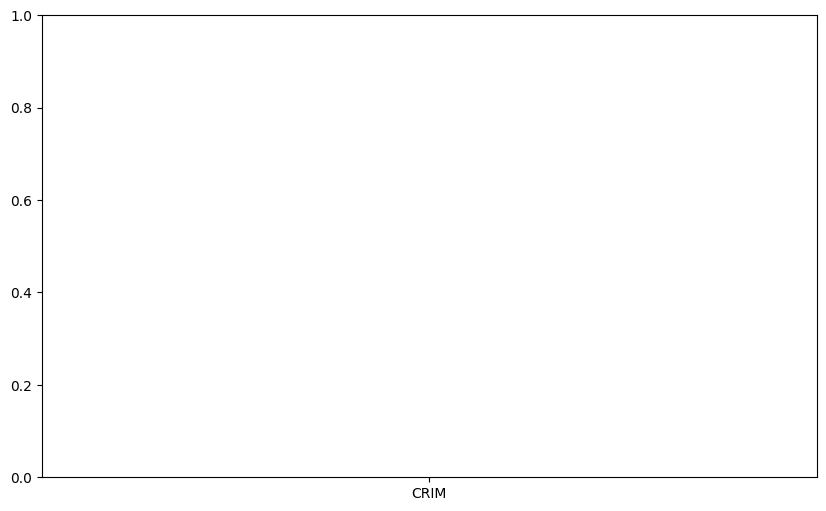

In [25]:

# Create linear regression and ridge regression models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
# Fit both models to the data
linear_model.fit(X_train_modified, y_train)
ridge_model.fit(X_train_modified, y_train)

# Get the coefficients from both models
linear_coeffs = linear_model.coef_
ridge_coeffs = ridge_model.coef_

# Create subplots for linear and ridge coefficients

plt.figure(figsize=(10, 6))

plt.plot(attributes, linear_coeffs, color='b', marker='o', linestyle='-', label='Linear Regression')
plt.plot(attributes, ridge_coeffs, color='orange', marker='^', linestyle='--', label='Ridge Regression')

plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.title("Linear vs. Ridge Regression Coefficients")
plt.legend()

plt.tight_layout()
plt.show()




### 15. Do you think you picked the correct 'N' features? Explain your rationale.! <div style="text-align: right"> [0.5 pts] </div>

In [ ]:
# To be honest Im not entirely sure how to asses this, im going to go with yes but its really just a 50/50 guess and I dont have 
# any good rationale to back this up.

### 16. Write About (what are they and what do they impact) <div style="text-align: right"> [0.5 pts] </div>

#### 16.1. Magnitude of Coefficients

In [ ]:
#This represents the weight or size assigned to each feature or attribute when making predictions in models like linear regression or ridge regression. It impacts
# the following:
# Predictions: magnitude of coefficients determines the strength of the relationshp between a feature and the target variable. Larger coefficients imply that
# changes in that feature are more influential in making predictions
# Feature Importance: Features with larger coefficients are typically considered more important.
# Regularization: In models like ridge regression magnitude of coefficients are directly affected by the regularization term. Larger coefficients are penalized
# more heavily which helps prevent  overfitting and promotes a balance between model complexity and performance.
# Model Complexity: Models with larger coefficients tend to be more complex and may capture noise in the data and are more prone to overfitting.

#### 16.2. Sign of Coefficients

In [ ]:
# The Sign of Coefficients in linear models represents the direction or nature of the relationship between each feature or attribute and the target variable.
# It impacts the direction of inlfuence. A Positive coefficient means that an increas in the features value is associated with an increase in the predicted target variable.
# a negative coefficient means that an increase in the features value is associated with a decrease in the predicted target variable.

### 17.Why is there any difference between the coefficients of the two (linear/ridge) models (if any)? <div style="text-align: right"> [0.5 pts] </div>

In [ ]:
# I think theres a difference in Regularization Effect and Multi Collinearity Handling with linear and ridge models. 
# Regularization Effect:
# In linear models coefficients are determined based on the training data and can take any value that minimizes the least squares error
# in ridge regression coefficient values and tends to shrink towards zero due to the L2 penalty.
# Multi Collinearity:
# Ridge regression is more effective at handling Multi Collinearity and by shrinking the coefficients it prevents the model from assigning disproportionately
# large coefficients to correlated features
# Linear regression can be more sensitive to Multi Collinearity and can cause unstable coefficient estimates.

### 18. What optimisation (cost reduction) method did you used? <div style="text-align: right"> [0.5 pts] </div>

In [ ]:
# Linear regression models by default use Least squares method as the cost reduction, since I didnt implement this model from scratch
# I stuck with the Least Squares method.

# Question 2(10 points)

You have been provided with a comprehensive dataset containing customer data collected during a recent marketing campaign. The primary objective of this assignment is to leverage machine learning techniques to predict whether a customer will respond positively (1) or negatively (0) to a promotional offer. The dataset encompasses a variety of customer attributes, including age, income, and previous purchase history.

a. Load and preprocess the dataset, preparing it for machine learning.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import recall_score, accuracy_score,precision_score,f1_score
from scipy.stats import pointbiserialr
from scipy.stats import pearsonr

path = 'data.csv'

def load_data(path):
    df = pd.read_csv(path, sep=';')
    return df

df = load_data(path)

def pre_process(df):
    # Convert 'Dt_Customer' to the number of days since the customer signed up
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['days_since_customer_signed_up'] = (df['Dt_Customer'] - df['Dt_Customer'].min()).dt.days

    # Drop the 'Dt_Customer' column
    df = df.drop(columns=['Dt_Customer'])

    # Convert boolean 'Marital_Status' values to 0 or 1
    df["Marital_Status"] = df["Marital_Status"].apply(lambda x: 1 if x else 0)

    return df
    
df = pre_process(df)

def replace_null_with_mean(df):
    # income column ahd 24 null values, replacing them with the mean
    # to maintain integrity in statistical analysis
    mean_income = df['Income'].mean()
    df['Income'].fillna(mean_income, inplace=True)
    return df

df =replace_null_with_mean(df)

def drop_values(df):
    # drop NaN values and Education column
    # debated whether or not to use one hot encoding to convert Education values to binary representation
    # but chose to drop this as It didnt seem to be a feature of importance
    df.dropna(axis=0, inplace=True)
    df = df.drop(columns=['Education'])
    return df
df = drop_values(df)



b. Perform EDA on data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             2240 non-null   int64  
 1   Year_Birth                     2240 non-null   int64  
 2   Marital_Status                 2240 non-null   int64  
 3   Income                         2240 non-null   float64
 4   Kidhome                        2240 non-null   int64  
 5   Teenhome                       2240 non-null   int64  
 6   Recency                        2240 non-null   int64  
 7   MntWines                       2240 non-null   int64  
 8   MntFruits                      2240 non-null   int64  
 9   MntMeatProducts                2240 non-null   int64  
 10  MntFishProducts                2240 non-null   int64  
 11  MntSweetProducts               2240 non-null   int64  
 12  MntGoldProds                   2240 non-null   i

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


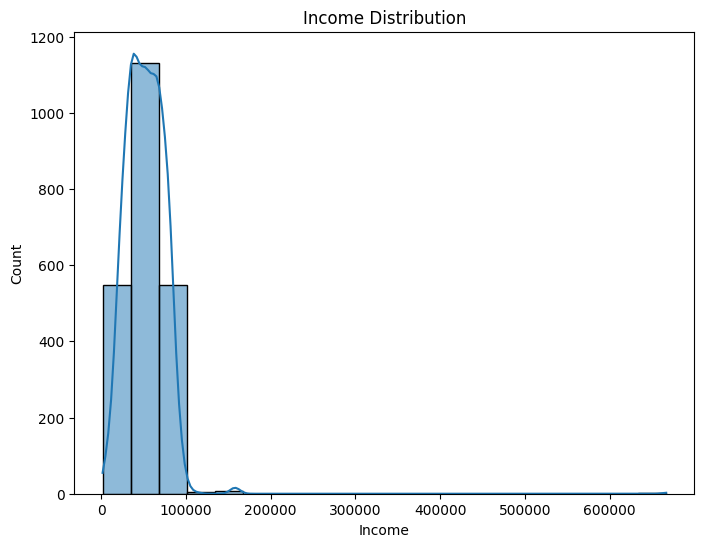

Correlation between Year_Birth and Income: -0.16094190079283546 (p-value: 1.817623934290998e-14) is statistically significant.
Correlation between Year_Birth and Kidhome: 0.23017553831520038 (p-value: 2.5526639843456857e-28) is statistically significant.
Correlation between Year_Birth and Teenhome: -0.3521114330406663 (p-value: 2.2425736180994213e-66) is statistically significant.
Correlation between Year_Birth and MntWines: -0.15777252303375283 (p-value: 5.909493571308053e-14) is statistically significant.
Correlation between Year_Birth and NumWebPurchases: -0.14504013843382482 (p-value: 5.3029782672702645e-12) is statistically significant.
Correlation between Year_Birth and NumCatalogPurchases: -0.12127463215267979 (p-value: 8.520585028721854e-09) is statistically significant.
Correlation between Year_Birth and NumStorePurchases: -0.12827205559380034 (p-value: 1.1099607633899154e-09) is statistically significant.


/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Correlation between Year_Birth and NumWebVisitsMonth: 0.12113925920382557 (p-value: 8.853486450608287e-09) is statistically significant.
Correlation between Income and Kidhome: -0.4251760082392527 (p-value: 4.964903105791184e-99) is statistically significant.
Correlation between Income and MntWines: 0.5767892127694021 (p-value: 7.784654407763376e-199) is statistically significant.
Correlation between Income and MntFruits: 0.4287470334186907 (p-value: 7.58555301167975e-101) is statistically significant.
Correlation between Income and MntMeatProducts: 0.5778021532599633 (p-value: 1.0914736281396333e-199) is statistically significant.
Correlation between Income and MntFishProducts: 0.4374965302532031 (p-value: 2.174161067355874e-105) is statistically significant.
Correlation between Income and MntSweetProducts: 0.43616159572501856 (p-value: 1.094088933842223e-104) is statistically significant.
Correlation between Income and MntGoldProds: 0.32197752258759754 (p-value: 3.383369232488843e-55

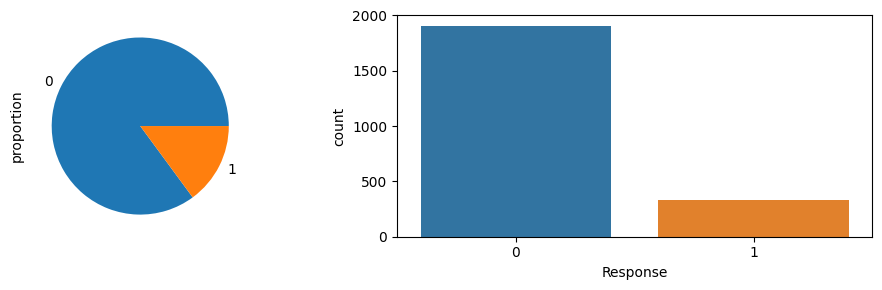

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64
0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64
0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64
0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64
0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64
0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64
0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
22

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

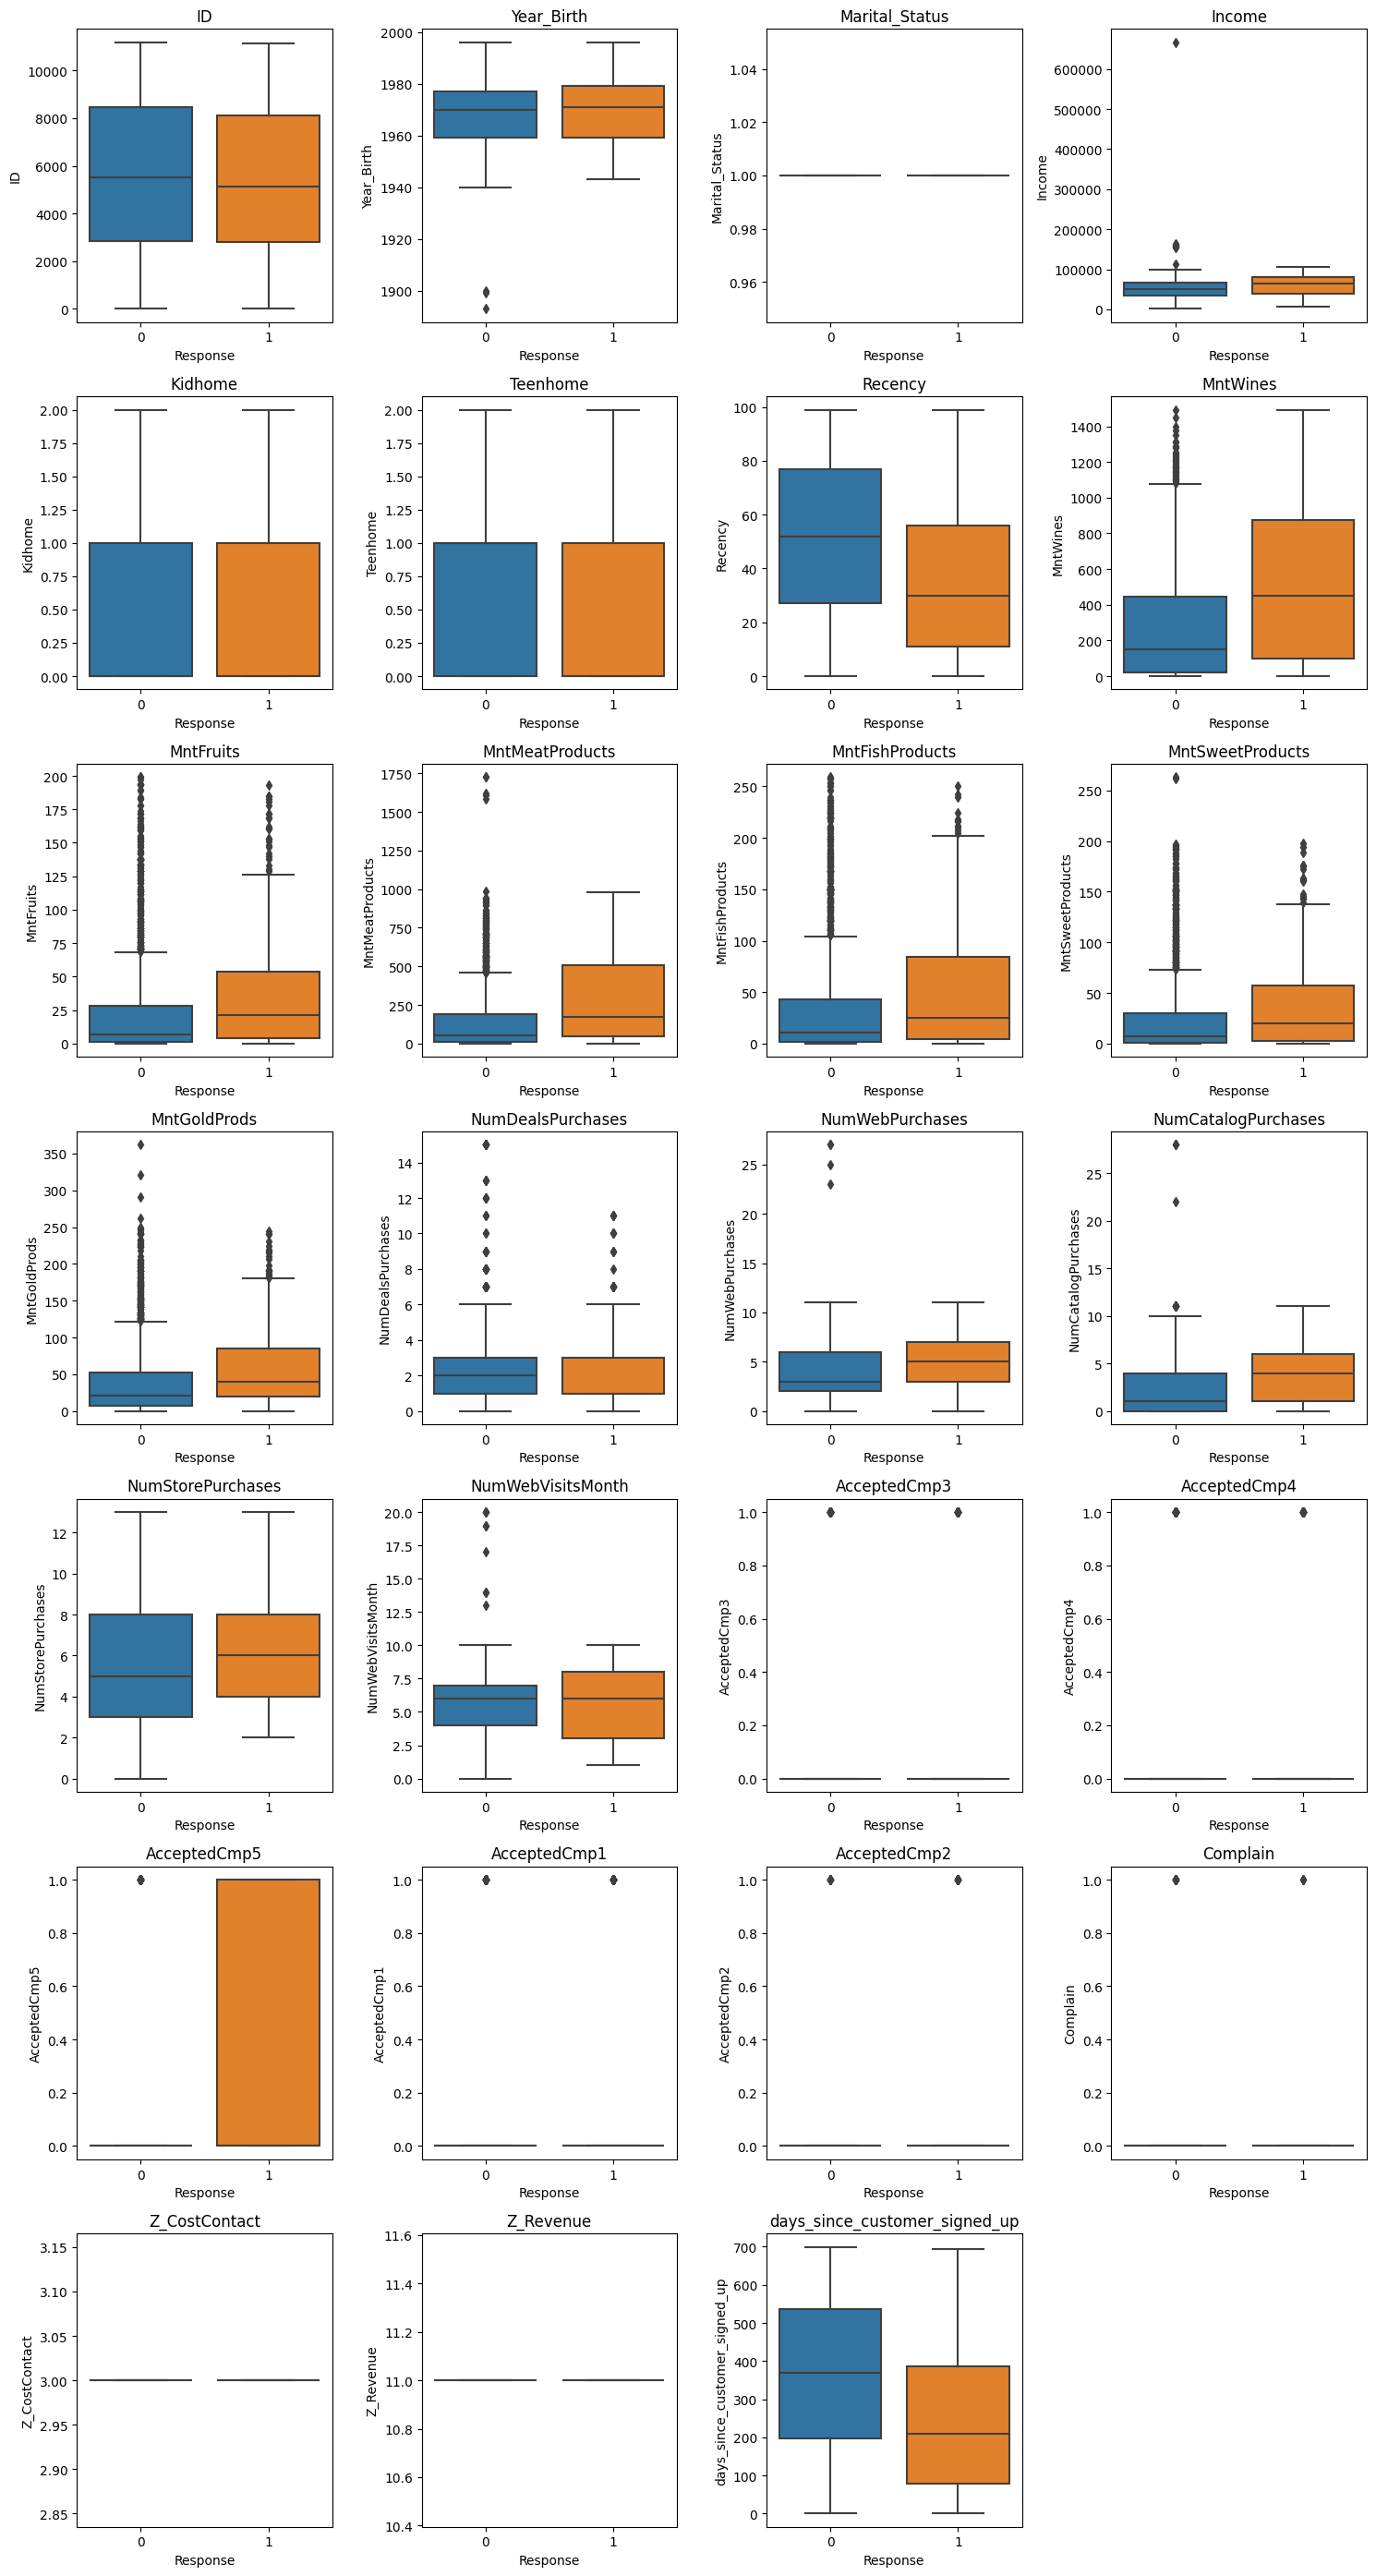

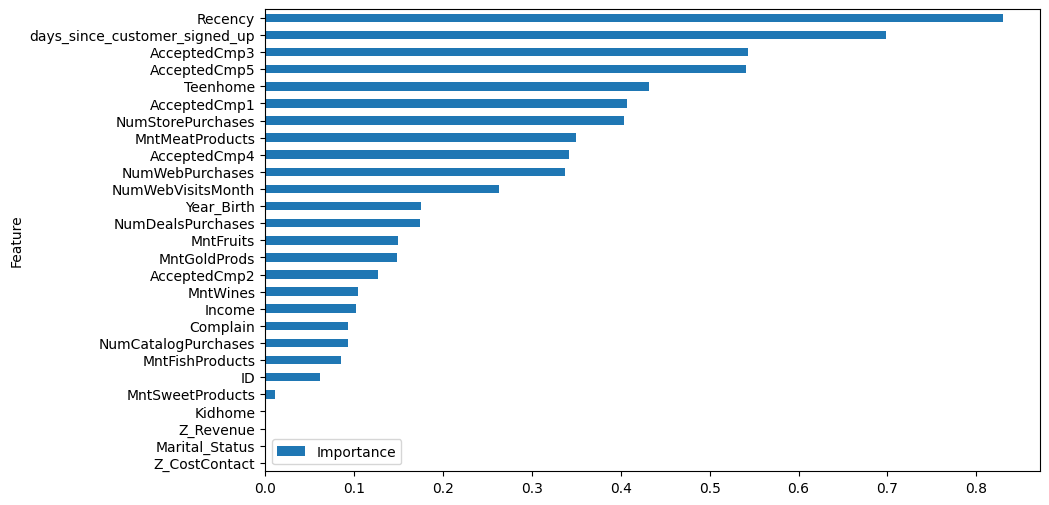

In [28]:


def describe_data(df):
    head = df.head()
    info = df.info()
    describe_data = df.describe()
    print(head)
    print(info)
    print(describe_data)
    
   

describe_data(df)


# Determine the range of incomes from customers
def income_histogram(df):
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Income'], bins=20, kde=True)
    plt.title('Income Distribution')
    plt.xlabel('Income')
    plt.show()
  

income_histogram(df)


def correlation_matrix(df, significance_level=0.001):
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_correlations = len(numeric_columns)

    for i in range(num_correlations):
        for j in range(i+1, num_correlations):
            col1 = numeric_columns[i]
            col2 = numeric_columns[j]
            corr, p_value = pearsonr(df[col1], df[col2])

            if p_value < significance_level:
                print(f'Correlation between {col1} and {col2}: {corr} (p-value: {p_value}) is statistically significant.')
    
correlation_matrix(df)


# determining if there is a relationship
# between number of catalog visits and number of web visits
# found a strong negative relationship, as number of catalog purchases went up, number of web visits went down.
def catalog_visits_vs_web_visits(df):
    num_catalog_purchases = df['NumCatalogPurchases']
    num_web_visits = df['NumWebVisitsMonth']
    # Calculate the Pearson correlation coefficient and the p-value
    correlation_coefficient, p_value = pearsonr(num_catalog_purchases, num_web_visits)
    # Display the results
    print(f'Pearson Correlation Coefficient: {correlation_coefficient:.2f}')
    print(f'p-value: {p_value:.4f}')
   

catalog_visits_vs_web_visits(df)

def determine_most_accepted_cmp(df):
    binary_response = df['Response']
    categorical_variables = ["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2"]
    correlation_results = []
    for variable in categorical_variables:
        # Calculate point-biserial correlation coefficient
        point_biserial_corr, _ = pointbiserialr(binary_response, df[variable])
        # Append the correlation coefficient and variable name to the results list
        correlation_results.append((variable, point_biserial_corr))
    # Display the correlation results
    for variable, correlation in correlation_results:
        print(f'Correlation between {variable} and Response: {correlation:.2f}')
   

determine_most_accepted_cmp(df)


def target_variable_distribution(df):
    # this shows a class imbalance
    fig= plt.figure(figsize=(10,3) )
    fig.add_subplot(1,2,1)
    a= df["Response"].value_counts(normalize=True).plot.pie()
    fig.add_subplot(1,2,2)
    churnchart=sns.countplot(x=df["Response"])
    plt.tight_layout()
    plt.show()
 
target_variable_distribution(df)




def boxplots_for_numerical_features():
    # Get all numerical columns (excluding the 'Response' column)
    numerical_columns = df.select_dtypes(include=['number']).drop(columns=['Response'])

    # Determine the number of numerical features for the subplots
    num_features = len(numerical_columns.columns)

    # Set the number of columns for the subplots 
    num_columns = 4

    # Calculate the number of rows needed for subplots
    num_rows = (num_features - 1) // num_columns + 1

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

    # Flatten the axes array to make indexing easier
    axes = axes.ravel()

    for i, feature in enumerate(numerical_columns.columns):
        ax = axes[i]
        print(df["Response"])
        sns.boxplot(x=df["Response"], y=numerical_columns[feature], ax=ax)
        ax.set_title(feature)

    # Remove any remaining empty subplots
    for i in range(num_features, num_columns * num_rows):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()
  
boxplots_for_numerical_features()


def feature_importance(df):
    y = df['Response']
    X = df.select_dtypes(include=['number']).drop(columns=['Response'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    coefficients = model.coef_[0]
    # Find feature importance
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
    feature_importance = feature_importance.sort_values('Importance', ascending=True)
    feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
    plt.show()

feature_importance(df)

c. Split the data into training and testing sets.

In [29]:
np.random.seed(0)
# independent variables will be all columns except response
X = df.drop(columns=['Response'])  
# response is the dependent variable, what were attempting to predict
y = df['Response'] 
print(X.shape)
print(y.shape)
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split X and y using Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75)


(2240, 27)
(2240,)


d. Train both a **Perceptron model and a Logistic Regression model** on the training data to predict customer responses to the promotional offer. (Note: Implement both the models from scratch, Don't use any pretrained model)

In [30]:

class LogisticRegression:

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y, weights):
        z = np.dot(X, weights)
        predict_1 = y * np.log(self.sigmoid(z))
        predict_0 = (1 - y) * np.log(1 - self.sigmoid(z))
        return -np.sum(predict_1 + predict_0) / len(X)

    def fit(self, X, y, epochs=25, lr=0.05):
        self.loss = []  # Store the loss values
        weights = np.random.rand(X.shape[1])
        N = len(X)

        for _ in range(epochs):
            # Gradient Descent
            y_hat = self.sigmoid(np.dot(X, weights))
            weights -= lr * np.dot(X.T, y_hat - y) / N
            # Saving Progress
            self.loss.append(self.cost_function(X, y, weights))

        self.weights = weights

    def predict(self, X):
        # Predicting with sigmoid function
        z = np.dot(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

model = LogisticRegression()

model.fit(X_train, y_train)

# Get the shape of train and test data
print("Train size X: ", X_train.shape)
print("Train size y: ", y_train.shape)
print("Test size X: ", X_test.shape)
print("Test size y: ", y_test.shape)

y_pred = model.predict(X_test)



Train size X:  (1680, 27)
Train size y:  (1680,)
Test size X:  (560, 27)
Test size y:  (560,)


e. Evaluate the performance of both models using classification metrics such as accuracy, precision, recall, and F1-score on the testing data.

In [31]:

# Calculate the F1 score, precision, recall, accuracy for Logistic Regression model
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("F1 Score: {:.2f}".format(f1))
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)




F1 Score: 0.42
Precision: 0.3031674208144796
Recall: 0.6836734693877551
Accuracy: 0.6696428571428571


In [32]:
# Perceptron Model
class Perceptron:

    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0.0)
            self.errors.append(error)

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [33]:
# Calculate the F1 score, precision, recall, accuracy for Perceptron Model
perceptron = Perceptron(learning_rate=0.1, epochs=25)

# Train the model with your training data
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred,average='macro')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred,average='macro')

# Calculate recall
recall = recall_score(y_test, y_pred,average='macro')

print("F1 Score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


F1 Score: 0.08
Accuracy: 0.10
Precision: 0.05
Recall: 0.19


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f. Compare and contrast the performance of the Perceptron model and the Logistic Regression model. Which model performed better, and why? Discuss any differences in their decision boundaries and the interpretability of their results.

In [339]:
# The Logistic Regression model seemed to perform significatnly better (although still kinda poor f1 score and accuracy measures) than 
# the perceptron model. This could likely be due to the decision boundary for the Logistic Regression model being a smooth S shaped curve
# aka the logistic sigmoid function. This maps the linear combinations of features into a probability score betwee 0 and 1. The threshold at wich
# the sigmoid function crosses 0.5 is then used to make binary classifications, such as whether or not a customer will respond to a promotional offer.

# The perceptron model had lower f1-score, accuracy, precision and recall scores and overall performed worse than the logisitic regression model.
# this could be due to the boundary being a hyperplane that separates the data points into two classes based on a linear combination of features. 
# this decision boundary is not probabilistic and directly classfies data points based on whether or not it falls above or below the hyperplane.

g. Provide recommendations on when to choose one model over the other for this specific marketing campaign scenario.

In [340]:
# My reccommendation would be to use the Logistic Regression model given that it performed better when evaluation the evaluation metrics.
# I think an area of improvement could be re iterating over the data set and determining if there were any missed steps in the preprocessing of 
# the data, which might increase the evaluation metrics.